# <center style='color:purple'>`Decision Tree` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# 2. Load `wheat_seed` dataset

In [2]:
df = pd.read_csv('wheat_seed.csv', sep='\t')
df.head()

,Area,Environment,Compactness,Length_of_the_nucleus,Width_of_the_core,Coefficient_of_asymmetry,Length_of_the_core_groove,Class,Class_names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [3]:
df.shape

(210, 9)

In [4]:
df['Class'].unique()

array([1, 2, 3])

In [5]:
df['Class_names'].unique()

array(['Kama', 'Rosa', 'Canadian'], dtype=object)

In [6]:
df['Class'].value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

# 3. Visualize selected features

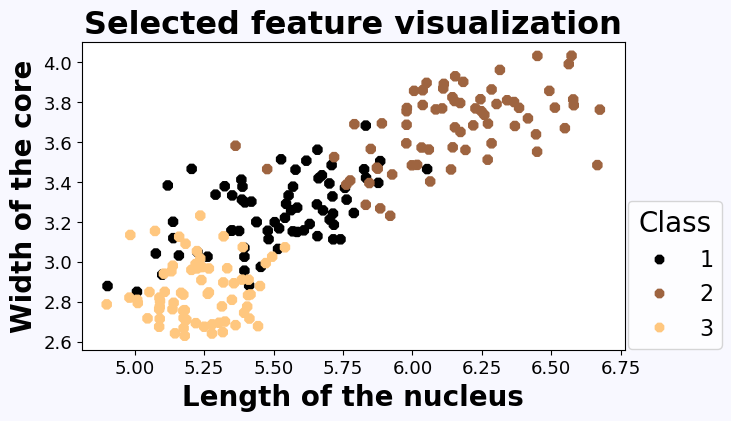

In [7]:
plt.figure(figsize=(7, 4), facecolor='ghostwhite')
sc = plt.scatter(df['Length_of_the_nucleus'], df['Width_of_the_core'], s=50, c=df['Class'], marker='8', cmap='copper')
plt.xlabel('Length of the nucleus', fontsize=20, fontweight='bold')
plt.ylabel('Width of the core', fontsize=20, fontweight='bold')
plt.title('Selected feature visualization', fontsize=23, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(*sc.legend_elements(), title='Class', fontsize=16, title_fontsize=20, bbox_to_anchor=(1.20, 0.52));

# 4. Separate features and labels

In [8]:
X = df.iloc[:, :-2]
y = df.loc[:, 'Class']

# 5. Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(168, 42, 168, 42)

# 6. Apply `Decision Tree`

In [11]:
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [12]:
print(f'Accuracy on the test set: {round(model.score(X_test, y_test), 4)}')

Accuracy on the test set: 0.9762


# 7. Plot `confusion_matrix`

In [13]:
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=model.classes_)

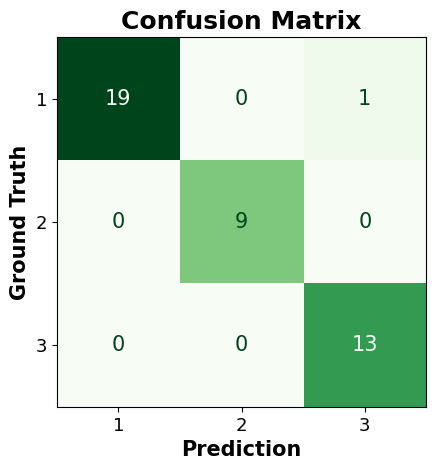

In [14]:
disp.plot(cmap='Greens', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [15]:
cat_labels = ['Kama', 'Rosa', 'Canadian']
y_pred = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

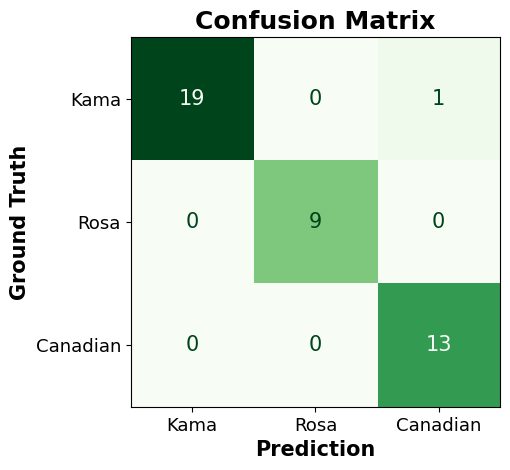

In [16]:
disp.plot(cmap='Greens', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [17]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('F1 score:', round(metrics.f1_score(y_test, y_pred, average='macro'), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred, average='macro'), 4))

Accuracy: 0.9762
F1 score: 0.9791
Jaccard score: 0.9595


# 8. Print `classification_report`

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



# 9. Plot `Decision Tree` 

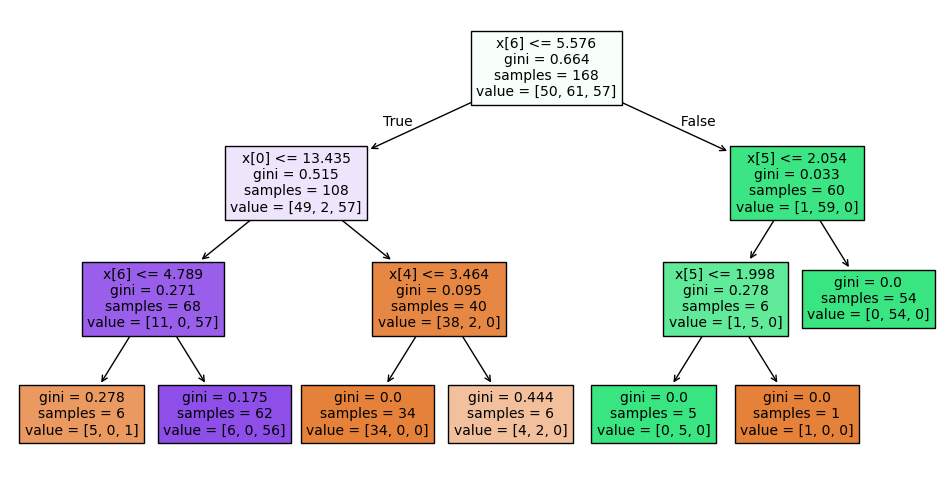

In [19]:
plt.figure(figsize=(12, 6))
plot_tree(model, fontsize=10, filled=True)
plt.show();

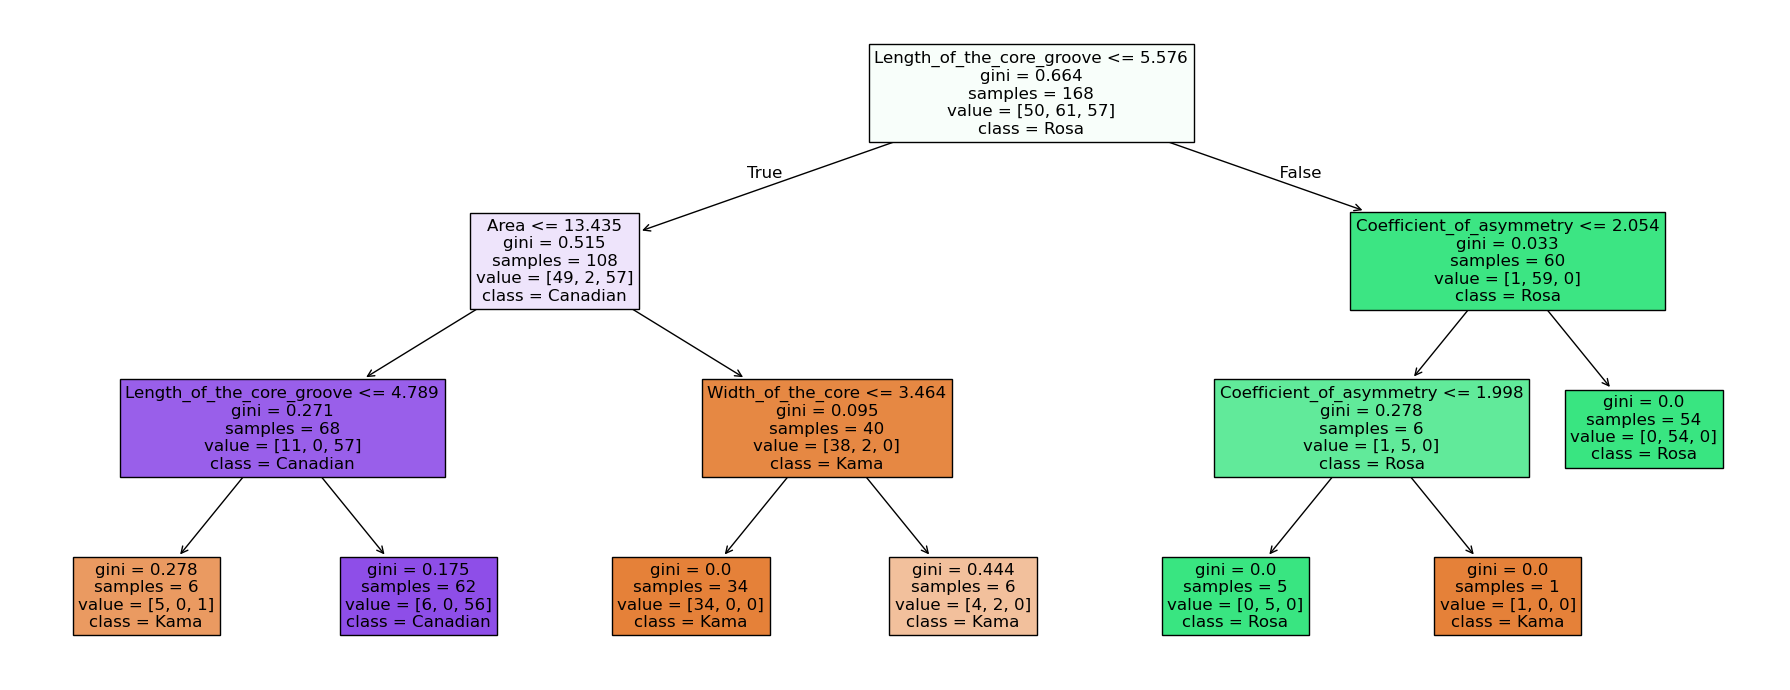

In [20]:
plt.figure(figsize=(18, 7))
plot_tree(model, fontsize=12, filled=True, feature_names=['Area', 'Environment', 'Compactness', 'Length_of_the_nucleus',
         'Width_of_the_core', 'Coefficient_of_asymmetry', 'Length_of_the_core_groove'], class_names=['Kama', 'Rosa',
         'Canadian'])
plt.tight_layout()
plt.show();

# 10. Plot `feature importance`

In [21]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

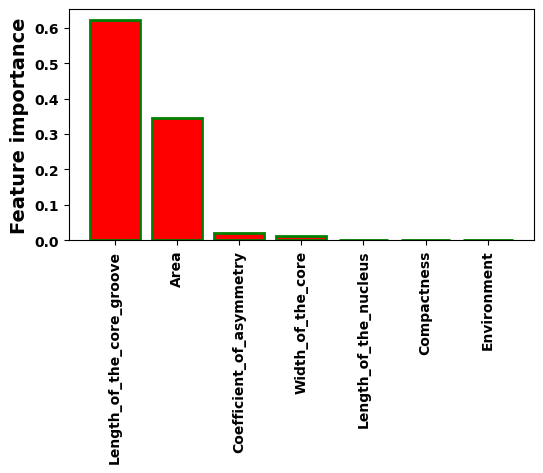

In [22]:
plt.figure(figsize=(6, 3))

plt.bar(range(X_train.shape[1]), importances[indices], align='center', color='r', edgecolor='g', linewidth=2)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Feature importance', fontsize=14, fontweight='bold');